## 1


w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

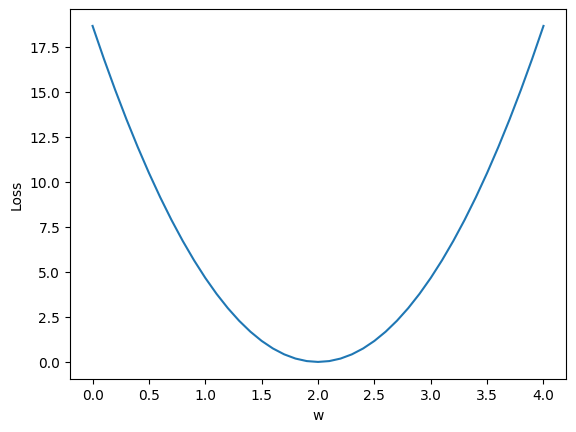

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


# model for forward pass
def forward(x):
    return x * w


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0

    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)

    print("MSE=", l_sum / len(x_data))
    w_list.append(w)
    mse_list.append(l_sum / len(x_data))

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()


## 2- manual gradient

In [28]:


w = 1.0  #random


def gradient(x, y):
    return 2 * x * (x * w - y)


print("Prediction before training",  4, forward(4))

# training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):

        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        print("\tgrad: ", x_val, y_val, round(grad, 2))
        l = loss(x_val, y_val)
    print("progress:", epoch, "w=", round(w, 2), "loss=", round(l, 2))

# After training
print("Predicted score after trainin)",  "4 hours of studying:", forward(4))


Prediction before training 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 2.69
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1.47
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 0.8
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 0.24
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 0.13
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 0.07
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 0.04
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 0.02
Pre

## 3 - auto gradient

In [29]:
import torch
import pdb

w = torch.tensor([1.0], requires_grad=True)


# new loss function
def loss(y_pred, y_val):
    return (y_pred - y_val) ** 2

print("Prediction before training",  4, forward(4).item())

for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val) #forward pass
        l = loss(y_pred, y_val) # compute loss
        l.backward() #backpropagation to update weights
        print("\t grad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()

        w.grad.data.zero_()

    print(f"Epoch: {epoch} | Loss: {l.item()}")

print("Prediction after training",  4, forward(4).item())


Prediction before training 4 4.0
	 grad:  1.0 2.0 -2.0
	 grad:  2.0 4.0 -7.840000152587891
	 grad:  3.0 6.0 -16.228801727294922
Epoch: 0 | Loss: 7.315943717956543
	 grad:  1.0 2.0 -1.478623867034912
	 grad:  2.0 4.0 -5.796205520629883
	 grad:  3.0 6.0 -11.998146057128906
Epoch: 1 | Loss: 3.9987640380859375
	 grad:  1.0 2.0 -1.0931644439697266
	 grad:  2.0 4.0 -4.285204887390137
	 grad:  3.0 6.0 -8.870372772216797
Epoch: 2 | Loss: 2.1856532096862793
	 grad:  1.0 2.0 -0.8081896305084229
	 grad:  2.0 4.0 -3.1681032180786133
	 grad:  3.0 6.0 -6.557973861694336
Epoch: 3 | Loss: 1.1946394443511963
	 grad:  1.0 2.0 -0.5975041389465332
	 grad:  2.0 4.0 -2.3422164916992188
	 grad:  3.0 6.0 -4.848389625549316
Epoch: 4 | Loss: 0.6529689431190491
	 grad:  1.0 2.0 -0.4417421817779541
	 grad:  2.0 4.0 -1.7316293716430664
	 grad:  3.0 6.0 -3.58447265625
Epoch: 5 | Loss: 0.35690122842788696
	 grad:  1.0 2.0 -0.3265852928161621
	 grad:  2.0 4.0 -1.2802143096923828
	 grad:  3.0 6.0 -2.650045394897461
Ep

## 5 -  linear_regression




In [30]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


model = Model()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(500):
    y_pred = model(x_data)

    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # 0 gradients perform a backward pass + update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4, model(hour_var).data[0][0].item())


Epoch: 0 | Loss: 103.82003784179688 
Epoch: 1 | Loss: 46.24197769165039 
Epoch: 2 | Loss: 20.609508514404297 
Epoch: 3 | Loss: 9.198319435119629 
Epoch: 4 | Loss: 4.1180419921875 
Epoch: 5 | Loss: 1.8561152219772339 
Epoch: 6 | Loss: 0.848840594291687 
Epoch: 7 | Loss: 0.4001062512397766 
Epoch: 8 | Loss: 0.20002268254756927 
Epoch: 9 | Loss: 0.11063649505376816 
Epoch: 10 | Loss: 0.07053400576114655 
Epoch: 11 | Loss: 0.05237545818090439 
Epoch: 12 | Loss: 0.04399051517248154 
Epoch: 13 | Loss: 0.03996068984270096 
Epoch: 14 | Loss: 0.037873826920986176 
Epoch: 15 | Loss: 0.03665607422590256 
Epoch: 16 | Loss: 0.03582953289151192 
Epoch: 17 | Loss: 0.03518117591738701 
Epoch: 18 | Loss: 0.03461620584130287 
Epoch: 19 | Loss: 0.034092314541339874 
Epoch: 20 | Loss: 0.033590562641620636 
Epoch: 21 | Loss: 0.03310251235961914 
Epoch: 22 | Loss: 0.0326244980096817 
Epoch: 23 | Loss: 0.032154541462659836 
Epoch: 24 | Loss: 0.031692009419202805 
Epoch: 25 | Loss: 0.031236328184604645 
Epoch

## 6 logistic_regression

In [31]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# training data + ground truth
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])


class Model(nn.Module):
    def __init__(self):

        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 in + 1 out

    def forward(self, x):
        y_pred = sigmoid(self.linear(x))
        return y_pred


model = Model()

criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_data)

    loss = criterion(y_pred, y_data)
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')


Epoch 1/1000 | Loss: 1.8471
Epoch 2/1000 | Loss: 1.8204
Epoch 3/1000 | Loss: 1.7938
Epoch 4/1000 | Loss: 1.7674
Epoch 5/1000 | Loss: 1.7413
Epoch 6/1000 | Loss: 1.7154
Epoch 7/1000 | Loss: 1.6897
Epoch 8/1000 | Loss: 1.6642
Epoch 9/1000 | Loss: 1.6390
Epoch 10/1000 | Loss: 1.6140
Epoch 11/1000 | Loss: 1.5893
Epoch 12/1000 | Loss: 1.5648
Epoch 13/1000 | Loss: 1.5406
Epoch 14/1000 | Loss: 1.5167
Epoch 15/1000 | Loss: 1.4931
Epoch 16/1000 | Loss: 1.4698
Epoch 17/1000 | Loss: 1.4467
Epoch 18/1000 | Loss: 1.4240
Epoch 19/1000 | Loss: 1.4016
Epoch 20/1000 | Loss: 1.3795
Epoch 21/1000 | Loss: 1.3577
Epoch 22/1000 | Loss: 1.3362
Epoch 23/1000 | Loss: 1.3151
Epoch 24/1000 | Loss: 1.2944
Epoch 25/1000 | Loss: 1.2740
Epoch 26/1000 | Loss: 1.2539
Epoch 27/1000 | Loss: 1.2342
Epoch 28/1000 | Loss: 1.2149
Epoch 29/1000 | Loss: 1.1960
Epoch 30/1000 | Loss: 1.1774
Epoch 31/1000 | Loss: 1.1592
Epoch 32/1000 | Loss: 1.1414
Epoch 33/1000 | Loss: 1.1239
Epoch 34/1000 | Loss: 1.1069
Epoch 35/1000 | Loss: 1

## 7 diabets_logistic

In [35]:
from torch import nn, optim, from_numpy
import numpy as np

xy = np.loadtxt('../data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = from_numpy(xy[:, 0:-1])
y_data = from_numpy(xy[:, [-1]])
print(f'X\'s shape: {x_data.shape} | Y\'s shape: {y_data.shape}')


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred


# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch + 1}/100 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


FileNotFoundError: ../data/diabetes.csv.gz not found.

## 8



In [ ]:
import numpy as np
from torch.utils.data import Dataset
from torch import from_numpy

class DiabetesDataset(Dataset):
    def __init__(self, csv_path='/content/diabetes-2.csv'):
        xy = np.loadtxt(
            csv_path,
            delimiter=',',
            dtype=np.float32,
            skiprows=1
        )
        self.x = from_numpy(xy[:, 0:-1])
        self.y = from_numpy(xy[:, -1:])
        self.n_samples = xy.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return self.n_samples



dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)

for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = tensor(inputs), tensor(labels)
        #training process
        print(f'Epoch: {i} | Inputs {inputs.data} | Labels {labels.data}')


## logistic





In [ ]:

from torch.utils.data import Dataset, DataLoader
from torch import nn, from_numpy, optim
import numpy as np


dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)


class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred


model = Model()

criterion = nn.BCELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        print(f'Epoch {epoch + 1} | Batch: {i+1} | Loss: {loss.item():.4f}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


## 9 - softmax loss


In [ ]:
from torch import nn, tensor, max
import numpy as np

# Cross entropy
# 0: 1 0 0
# 1: 0 1 0
# 2: 0 0 1
Y = np.array([1, 0, 0])
Y_pred1 = np.array([0.7, 0.2, 0.1])
Y_pred2 = np.array([0.1, 0.3, 0.6])
print(f'Loss1: {np.sum(-Y * np.log(Y_pred1)):.4f}')
print(f'Loss2: {np.sum(-Y * np.log(Y_pred2)):.4f}')

# Softmax + CrossEntropy (logSoftmax + NLLLoss)
loss = nn.CrossEntropyLoss()

Y = tensor([0], requires_grad=False)

Y_pred1 = tensor([[2.0, 1.0, 0.1]])
Y_pred2 = tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)

print(f'PyTorch Loss1: {l1.item():.4f} \nPyTorch Loss2: {l2.item():.4f}')
print(f'Y_pred1: {max(Y_pred1.data, 1)[1].item()}')
print(f'Y_pred2: {max(Y_pred2.data, 1)[1].item()}')


Y = tensor([2, 0, 1], requires_grad=False)

Y_pred1 = tensor([[0.1, 0.2, 0.9],
                  [1.1, 0.1, 0.2],
                  [0.2, 2.1, 0.1]])

Y_pred2 = tensor([[0.8, 0.2, 0.3],
                  [0.2, 0.3, 0.5],
                  [0.2, 0.2, 0.5]])

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)
print(f'Batch Loss1:  {l1.item():.4f} \nBatch Loss2: {l2.data:.4f}')


## softmax_mnist

In [ ]:
from __future__ import print_function
from torch import nn, optim, cuda
from torch.utils import data
from torchvision import datasets, transforms
import torch.nn.functional as F
import time

batch_size = 64
device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Training MNIST Model on {device}\n{"=" * 44}')

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# pipeline
train_loader = data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)


model = Net()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).item()
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(f'------------------------------------------------------\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')


if __name__ == '__main__':
    since = time.time()
    for epoch in range(1, 10):
        epoch_start = time.time()
        train(epoch)
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Training time: {m:.0f}m {s:.0f}s')
        test()
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Testing time: {m:.0f}m {s:.0f}s')

    m, s = divmod(time.time() - since, 60)
    print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')



## 10 cnn mnist

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

batch_size = 64

train_dataset = datasets.MNIST(root='./data/',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()


## `11 toy_inception MNIST

> Add blockquote



In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

batch_size = 64
epochs = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class InceptionA(nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.incept1 = InceptionA(in_channels=10)

        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten
        x = self.fc(x)
        return F.log_softmax(x, dim=1)


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader, 1):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)  # default reduction='mean'
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_value = loss.item()
            processed = batch_idx * len(data)
            total = len(train_loader.dataset)
            percent = 100. * batch_idx / len(train_loader)
            print(f'Train Epoch: {epoch} [{processed}/{total} ({percent:.0f}%)]\tLoss: {loss_value:.6f}')


def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()

            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')


for epoch in range(1, epochs + 1):
    train(epoch)
    test()


## 12 RNN basics




In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

# one hot encoding
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

cell = nn.RNN(input_size=4, hidden_size=2, batch_first=True)

hidden = Variable(torch.randn(1, 1, 2))

# propagate input through RNN
inputs = Variable(torch.Tensor([h, e, l, l, o]))
for one in inputs:
    one = one.view(1, 1, -1)

    out, hidden = cell(one, hidden)
    print("one input size", one.size(), "out size", out.size())


inputs = inputs.view(1, 5, -1)
out, hidden = cell(inputs, hidden)
print("sequence input size", inputs.size(), "out size", out.size())


hidden = Variable(torch.randn(1, 3, 2))


inputs = Variable(torch.Tensor([[h, e, l, l, o],
                                [e, o, l, l, l],
                                [l, l, e, e, l]]))

# B x S x I
out, hidden = cell(inputs, hidden)
print("batch input size", inputs.size(), "out size", out.size())


cell = nn.RNN(input_size=4, hidden_size=2)

inputs = inputs.transpose(dim0=0, dim1=1)

out, hidden = cell(inputs, hidden)
print("batch input size", inputs.size(), "out size", out.size())


## hello RNN

In [ ]:
import sys
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)  # reproducibility
#            0    1    2    3    4
idx2char = ['h', 'i', 'e', 'l', 'o']

x_data = [0, 1, 0, 2, 3, 3]   # hihell
one_hot_lookup = [[1, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 1]]

y_data = [1, 0, 2, 3, 3, 4]    # ihello
x_one_hot = [one_hot_lookup[x] for x in x_data]

inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5  # one hot size
hidden_size = 5  # output from the RNN
batch_size = 1   # one sentence
sequence_length = 1
num_layers = 1


class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size, batch_first=True)

    def forward(self, hidden, x):
        #reshape
        x = x.view(batch_size, sequence_length, input_size)

        out, hidden = self.rnn(x, hidden)
        return hidden, out.view(-1, num_classes)

    def init_hidden(self):
        return Variable(torch.zeros(num_layers, batch_size, hidden_size))


# RNN model
model = Model()
print(model)

# crossEntropyLoss = LogSoftmax +  NLLLoss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# train
for epoch in range(100):
    optimizer.zero_grad()
    loss = 0
    hidden = model.init_hidden()

    sys.stdout.write("predicted string: ")
    for input, label in zip(inputs, labels):
        hidden, output = model(hidden, input)
        val, idx = output.max(1)
        sys.stdout.write(idx2char[idx.data[0]])
        loss += criterion(output, torch.LongTensor([label]))

    print(", epoch: %d, loss: %1.3f" % (epoch + 1, loss))

    loss.backward()
    optimizer.step()

print("Learning finished !!! ")


## `

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)


idx2char = ['h', 'i', 'e', 'l', 'o']

x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0]]]

y_data = [1, 0, 2, 3, 3, 4]    # ihello

inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5
hidden_size = 5
batch_size = 1
sequence_length = 6
num_layers = 1


class RNN(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length

        self.rnn = nn.RNN(input_size=5, hidden_size=5, batch_first=True)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        x.view(x.size(0), self.sequence_length, self.input_size)

        out, _ = self.rnn(x, h_0)
        return out.view(-1, num_classes)


rnn = RNN(num_classes, input_size, hidden_size, num_layers)
print(rnn)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.1)

for epoch in range(100):
    outputs = rnn(inputs)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    result_str = [idx2char[c] for c in idx.squeeze()]
    print("epoch: %d, loss: %1.3f" % (epoch + 1, loss.item()))
    print("Predicted string: ", ''.join(result_str))

print("Learning finished!")


## hello RNN EMBEDDINGS





In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)


idx2char = ['h', 'i', 'e', 'l', 'o']


x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
y_data = [1, 0, 2, 3, 3, 4]    # ihello

inputs = Variable(torch.LongTensor(x_data))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5
embedding_size = 10
hidden_size = 5
sequence_length = 6
num_layers = 1


class Model(nn.Module):

    def __init__(self, num_layers, hidden_size):
        super(Model, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.RNN(input_size=embedding_size,
                          hidden_size=5, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):

        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        emb = self.embedding(x)
        emb = emb.view(batch_size, sequence_length, -1)


        # h_0: (num_layers * num_directions, batch, hidden_size)
        out, _ = self.rnn(emb, h_0)
        return self.fc(out.view(-1, num_classes))


model = Model(num_layers, hidden_size)
print(model)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(100):
    outputs = model(inputs)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    result_str = [idx2char[c] for c in idx.squeeze()]
    print("epoch: %d, loss: %1.3f" % (epoch + 1, loss.item()))
    print("Predicted string: ", ''.join(result_str))

print("Learning finished!")


## rnn_classification basics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Colab Notebooks/name_dataset.py" /content/


In [ ]:
import time
import math
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from name_dataset import NameDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

HIDDEN_SIZE = 100
N_CHARS = 128
N_CLASSES = 18


class RNNClassifier(nn.Module):

    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input):

        batch_size = input.size(0)

        input = input.t()

        print("  input", input.size())
        embedded = self.embedding(input)
        print("  embedding", embedded.size())

        hidden = self._init_hidden(batch_size)

        output, hidden = self.gru(embedded, hidden)
        print("  gru hidden output", hidden.size())

        fc_output = self.fc(hidden)
        print("  fc output", fc_output.size())
        return fc_output

    def _init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_size)
        return Variable(hidden)


def str2ascii_arr(msg):
    arr = [ord(c) for c in msg]
    return arr, len(arr)

def pad_sequences(vectorized_seqs, seq_lengths):
    seq_tensor = torch.zeros((len(vectorized_seqs), seq_lengths.max())).long()
    for idx, (seq, seq_len) in enumerate(zip(vectorized_seqs, seq_lengths)):
        seq_tensor[idx, :seq_len] = torch.LongTensor(seq)
    return seq_tensor

def make_variables(names):
    sequence_and_length = [str2ascii_arr(name) for name in names]
    vectorized_seqs = [sl[0] for sl in sequence_and_length]
    seq_lengths = torch.LongTensor([sl[1] for sl in sequence_and_length])
    return pad_sequences(vectorized_seqs, seq_lengths)


if __name__ == '__main__':
    names = ['adylov', 'solan', 'hard', 'san']
    classifier = RNNClassifier(N_CHARS, HIDDEN_SIZE, N_CLASSES)

    for name in names:
        arr, _ = str2ascii_arr(name)
        inp = Variable(torch.LongTensor([arr]))
        out = classifier(inp)
        print("in", inp.size(), "out", out.size())


    inputs = make_variables(names)
    out = classifier(inputs)
    print("batch in", inputs.size(), "batch out", out.size())




## rnn_classification

> Add blockquote



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!mkdir -p /content/data

!cp "/content/drive/MyDrive/Colab Notebooks/names_train.csv.gz" /content/data/
!cp "/content/drive/MyDrive/Colab Notebooks/names_test.csv.gz"  /content/data/

!ls -l /content/data


In [ ]:
import time
import math
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from name_dataset import NameDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

HIDDEN_SIZE = 100
N_LAYERS = 2
BATCH_SIZE = 256
N_EPOCHS = 100

test_dataset = NameDataset(is_train_set=False)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE, shuffle=True)


train_dataset = NameDataset(is_train_set=True)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE, shuffle=True)

N_COUNTRIES = len(train_dataset.get_countries())
print(N_COUNTRIES, "countries")
N_CHARS = 128


def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def create_variable(tensor):
    if torch.cuda.is_available():
        return Variable(tensor.cuda())
    else:
        return Variable(tensor)


def pad_sequences(vectorized_seqs, seq_lengths, countries):
    seq_tensor = torch.zeros((len(vectorized_seqs), seq_lengths.max())).long()
    for idx, (seq, seq_len) in enumerate(zip(vectorized_seqs, seq_lengths)):
        seq_tensor[idx, :seq_len] = torch.LongTensor(seq)

    seq_lengths, perm_idx = seq_lengths.sort(0, descending=True)
    seq_tensor = seq_tensor[perm_idx]

    target = countries2tensor(countries)
    if len(countries):
        target = target[perm_idx]


    return create_variable(seq_tensor), \
        create_variable(seq_lengths), \
        create_variable(target)


def make_variables(names, countries):
    sequence_and_length = [str2ascii_arr(name) for name in names]
    vectorized_seqs = [sl[0] for sl in sequence_and_length]
    seq_lengths = torch.LongTensor([sl[1] for sl in sequence_and_length])
    return pad_sequences(vectorized_seqs, seq_lengths, countries)


def str2ascii_arr(msg):
    arr = [ord(c) for c in msg]
    return arr, len(arr)


def countries2tensor(countries):
    country_ids = [train_dataset.get_country_id(
        country) for country in countries]
    return torch.LongTensor(country_ids)


class RNNClassifier(nn.Module):
    # MODEL

    def __init__(self, input_size, hidden_size, output_size, n_layers=1, bidirectional=True):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.n_directions = int(bidirectional) + 1

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers,
                          bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input, seq_lengths):

        input = input.t()
        batch_size = input.size(1)

        hidden = self._init_hidden(batch_size)

        #  S x B -> S x B x I
        embedded = self.embedding(input)

        gru_input = pack_padded_sequence(
            embedded, seq_lengths.data.cpu().numpy())

        self.gru.flatten_parameters()
        output, hidden = self.gru(gru_input, hidden)


        fc_output = self.fc(hidden[-1])
        return fc_output

    def _init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers * self.n_directions,
                             batch_size, self.hidden_size)
        return create_variable(hidden)


# Train cycle
def train():
    total_loss = 0

    for i, (names, countries) in enumerate(train_loader, 1):
        input, seq_lengths, target = make_variables(names, countries)
        output = classifier(input, seq_lengths)

        loss = criterion(output, target)
        total_loss += loss.item()

        classifier.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 10 == 0:
            print('[{}] Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.2f}'.format(
                time_since(start), epoch,  i *
                len(names), len(train_loader.dataset),
                100. * i * len(names) / len(train_loader.dataset),
                total_loss / i * len(names)))

    return total_loss


def test(name=None):
    if name:
        input, seq_lengths, target = make_variables([name], [])
        output = classifier(input, seq_lengths)
        pred = output.data.max(1, keepdim=True)[1]
        country_id = pred.cpu().numpy()[0][0]
        print(name, "is", train_dataset.get_country(country_id))
        return

    print("evaluating trained model ...")
    correct = 0
    train_data_size = len(test_loader.dataset)

    for names, countries in test_loader:
        input, seq_lengths, target = make_variables(names, countries)
        output = classifier(input, seq_lengths)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct, train_data_size, 100. * correct / train_data_size))


if __name__ == '__main__':

    classifier = RNNClassifier(N_CHARS, HIDDEN_SIZE, N_COUNTRIES, N_LAYERS)
    if torch.cuda.device_count() > 1:
        print("Let's use", torch.cuda.device_count(), "GPUs!")
        # dim = 0     [33, xxx] -> [11, ...], [11, ...], [11, ...] on 3 GPUs
        classifier = nn.DataParallel(classifier)

    if torch.cuda.is_available():
        classifier.cuda()

    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    start = time.time()
    print("Training for %d epochs..." % N_EPOCHS)
    for epoch in range(1, N_EPOCHS + 1):
        train()

        test()

        test("Sung")
        test("Jungwoo")
        test("Soojin")
        test("Nako")


## RNN CHAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!mkdir -p /content/data

!cp "/content/drive/MyDrive/Colab Notebooks/shakespeare.txt.gz" /content/data/

!ls -l /content/data


In [ ]:
import time
import math
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from text_loader import TextDataset

hidden_size   = 100
n_layers      = 3
batch_size    = 1
n_epochs      = 100
n_characters  = 128
device        = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.n_layers    = n_layers

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru       = nn.GRU(hidden_size, hidden_size, n_layers)
        self.linear    = nn.Linear(hidden_size, output_size)

    def forward(self, input_char, hidden):
        # LongTensor scalar
        embed  = self.embedding(input_char.view(1, -1))
        embed  = embed.view(1, 1, -1)
        output, hidden = self.gru(embed, hidden)
        output = self.linear(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        h = torch.zeros(self.n_layers, 1, self.hidden_size, device=device)
        return h


def str2tensor(string):
    arr = [ord(c) for c in string]
    t   = torch.LongTensor(arr).to(device)
    return t


def generate(decoder, prime_str='A', predict_len=100, temperature=0.8):
    decoder.eval()
    hidden = decoder.init_hidden()
    prime_input = str2tensor(prime_str)
    predicted = prime_str

    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)

    inp = prime_input[-1]

    with torch.no_grad():
        for _ in range(predict_len):
            output, hidden = decoder(inp, hidden)

            dist = output.view(-1).div(temperature).exp()
            top_i = torch.multinomial(dist, 1).item()
            predicted_char = chr(top_i)
            predicted += predicted_char
            inp = torch.LongTensor([top_i]).to(device)

    return predicted


def train_teacher_forcing(line):
    decoder.train()
    input_t  = str2tensor(line[:-1])
    target_t = str2tensor(line[1:])

    hidden = decoder.init_hidden()
    loss = 0.0
    for c in range(len(input_t)):
        output, hidden = decoder(input_t[c], hidden)
        loss += criterion(output, target_t[c].unsqueeze(0))
    decoder.zero_grad()
    loss.backward()
    decoder_optimizer.step()
    return loss.item() / len(input_t)


def train_sampling(line):
    decoder.train()
    input_t  = str2tensor(line[:-1])
    target_t = str2tensor(line[1:])

    hidden   = decoder.init_hidden()
    decoder_in = input_t[0]
    loss = 0.0
    for c in range(len(input_t)):
        output, hidden = decoder(decoder_in, hidden)
        loss += criterion(output, target_t[c].unsqueeze(0))
        decoder_in = output.argmax(dim=1)
    decoder.zero_grad()
    loss.backward()
    decoder_optimizer.step()
    return loss.item() / len(input_t)


if __name__ == '__main__':
    decoder = RNN(n_characters, hidden_size, n_characters, n_layers).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train_loader = DataLoader(
        dataset=TextDataset(),
        batch_size=batch_size,
        shuffle=True
    )

    print(f"Training for {n_epochs} epochs on {device}…")
    for epoch in range(1, n_epochs + 1):
        for i, (lines, _) in enumerate(train_loader):
            loss = train_sampling(lines[0])

            if i % 100 == 0:
                pct = epoch / n_epochs * 100
                print(f'[(Epoch {epoch} {pct:.1f}% ) loss: {loss:.4f}]')
                print(generate(decoder, 'Wh', 100), '\n')


## pack_pad

In [ ]:

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F
import numpy as np
import itertools


def flatten(l):
    return list(itertools.chain.from_iterable(l))

seqs = ['ghatmasala', 'nicela', 'chutpakodas']

vocab = ['<pad>'] + sorted(list(set(flatten(seqs))))

# model
embedding_size = 3
embed = nn.Embedding(len(vocab), embedding_size)
lstm = nn.LSTM(embedding_size, 5)

vectorized_seqs = [[vocab.index(tok) for tok in seq]for seq in seqs]
print("vectorized_seqs", vectorized_seqs)

print([x for x in map(len, vectorized_seqs)])
# get the length of each seq in your batch
seq_lengths = torch.LongTensor([x for x in map(len, vectorized_seqs)])


seq_tensor = Variable(torch.zeros(
    (len(vectorized_seqs), seq_lengths.max()))).long()
for idx, (seq, seqlen) in enumerate(zip(vectorized_seqs, seq_lengths)):
    seq_tensor[idx, :seqlen] = torch.LongTensor(seq)

print("seq_tensor", seq_tensor)

#sort by length
seq_lengths, perm_idx = seq_lengths.sort(0, descending=True)
seq_tensor = seq_tensor[perm_idx]

print("seq_tensor after sorting", seq_tensor)

seq_tensor = seq_tensor.transpose(0, 1)  # (B,L,D) -> (L,B,D)
print("seq_tensor after transposing", seq_tensor.size(), seq_tensor.data)


embeded_seq_tensor = embed(seq_tensor)
print("seq_tensor after embeding", embeded_seq_tensor.size(), seq_tensor.data)

packed_input = pack_padded_sequence(
    embeded_seq_tensor, seq_lengths.cpu().numpy())

# throw them through your LSTM
packed_output, (ht, ct) = lstm(packed_input)

# unpack your output
output, _ = pad_packed_sequence(packed_output)
print("Lstm output", output.size(), output.data)

# if you just want the final hidden state?
print("Last output", ht[-1].size(), ht[-1].data)


## seq2seq

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from text_loader import TextDataset
import seq2seq_models as sm
from seq2seq_models import str2tensor, EOS_token, SOS_token

HIDDEN_SIZE = 100
N_LAYERS = 1
BATCH_SIZE = 1
N_EPOCH = 100
N_CHARS = 128  # ASCII


def test():
    encoder_hidden = encoder.init_hidden()
    word_input = str2tensor('hello')
    encoder_outputs, encoder_hidden = encoder(word_input, encoder_hidden)
    print(encoder_outputs)

    decoder_hidden = encoder_hidden

    word_target = str2tensor('pytorch')
    for c in range(len(word_target)):
        decoder_output, decoder_hidden = decoder(
            word_target[c], decoder_hidden)
        print(decoder_output.size(), decoder_hidden.size())


def train(src, target):
    src_var = str2tensor(src)
    target_var = str2tensor(target, eos=True)

    encoder_hidden = encoder.init_hidden()
    encoder_outputs, encoder_hidden = encoder(src_var, encoder_hidden)

    hidden = encoder_hidden
    loss = 0

    for c in range(len(target_var)):

        token = target_var[c - 1] if c else str2tensor(SOS_token)
        output, hidden = decoder(token, hidden)
        loss += criterion(output, target_var[c])

    encoder.zero_grad()
    decoder.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.data[0] / len(target_var)



def translate(enc_input='thisissungkim.iloveyou.', predict_len=100, temperature=0.9):
    input_var = str2tensor(enc_input)
    encoder_hidden = encoder.init_hidden()
    encoder_outputs, encoder_hidden = encoder(input_var, encoder_hidden)

    hidden = encoder_hidden

    predicted = ''
    dec_input = str2tensor(SOS_token)
    for c in range(predict_len):
        output, hidden = decoder(dec_input, hidden)


        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]

        if top_i is EOS_token:
            break

        predicted_char = chr(top_i)
        predicted += predicted_char

        dec_input = str2tensor(predicted_char)

    return enc_input, predicted


encoder = sm.EncoderRNN(N_CHARS, HIDDEN_SIZE, N_LAYERS)
decoder = sm.DecoderRNN(HIDDEN_SIZE, N_CHARS, N_LAYERS)

if torch.cuda.is_available():
    decoder.cuda()
    encoder.cuda()
print(encoder, decoder)
test()

params = list(encoder.parameters()) + list(decoder.parameters())
optimizer = torch.optim.Adam(params, lr=0.001)
criterion = nn.CrossEntropyLoss()


train_loader = DataLoader(dataset=TextDataset(),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=2)

print("Training for %d epochs..." % N_EPOCH)
for epoch in range(1, N_EPOCH + 1):
    for i, (srcs, targets) in enumerate(train_loader):
        train_loss = train(srcs[0], targets[0])  # batch= 1

        if i % 100 is 0:
            print('[(%d %d%%) %.4f]' %
                  (epoch, epoch / N_EPOCH * 100, train_loss))
            print(translate(srcs[0]), '\n')
            print(translate(), '\n')


## seq2seq

> Add blockquote



In [ ]:

import torch
import torch.nn as nn

from torch.utils.data import DataLoader
from text_loader import TextDataset
import seq2seq_models as sm
from seq2seq_models import cuda_variable, str2tensor, EOS_token, SOS_token


N_LAYERS = 1
BATCH_SIZE = 1
N_EPOCH = 100
N_CHARS = 128  #ASCII
HIDDEN_SIZE = N_CHARS


def test():
    encoder_test = sm.EncoderRNN(10, 10, 2)
    decoder_test = sm.AttnDecoderRNN(10, 10, 2)

    if torch.cuda.is_available():
        encoder_test.cuda()
        decoder_test.cuda()

    encoder_hidden = encoder_test.init_hidden()
    word_input = cuda_variable(torch.LongTensor([1, 2, 3]))
    encoder_outputs, encoder_hidden = encoder_test(word_input, encoder_hidden)
    print(encoder_outputs.size())

    word_target = cuda_variable(torch.LongTensor([1, 2, 3]))
    decoder_attns = torch.zeros(1, 3, 3)
    decoder_hidden = encoder_hidden

    for c in range(len(word_target)):
        decoder_output, decoder_hidden, decoder_attn = \
            decoder_test(word_target[c],
                         decoder_hidden, encoder_outputs)
        print(decoder_output.size(), decoder_hidden.size(), decoder_attn.size())
        decoder_attns[0, c] = decoder_attn.squeeze(0).cpu().data


def train(src, target):
    loss = 0

    src_var = str2tensor(src)
    target_var = str2tensor(target, eos=True)  #EOS token

    encoder_hidden = encoder.init_hidden()
    encoder_outputs, encoder_hidden = encoder(src_var, encoder_hidden)

    hidden = encoder_hidden

    for c in range(len(target_var)):
    # sos first
        token = target_var[c - 1] if c else str2tensor(SOS_token)
        output, hidden, attention = decoder(token, hidden, encoder_outputs)
        loss += criterion(output, target_var[c])

    encoder.zero_grad()
    decoder.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.data[0] / len(target_var)


def translate(enc_input='thisissungkim.iloveyou.', predict_len=100, temperature=0.9):
    input_var = str2tensor(enc_input)
    encoder_hidden = encoder.init_hidden()
    encoder_outputs, encoder_hidden = encoder(input_var, encoder_hidden)

    hidden = encoder_hidden

    predicted = ''
    dec_input = str2tensor(SOS_token)
    attentions = []
    for c in range(predict_len):
        output, hidden, attention = decoder(dec_input, hidden, encoder_outputs)
        # sample from the network as a multinominal distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        attentions.append(attention.view(-1).data.cpu().numpy().tolist())

        # stop st EOS
        if top_i is EOS_token:
            break

        predicted_char = chr(top_i)
        predicted += predicted_char

        dec_input = str2tensor(predicted_char)

    return predicted, attentions


if __name__ == '__main__':
    encoder = sm.EncoderRNN(N_CHARS, HIDDEN_SIZE, N_LAYERS)
    decoder = sm.AttnDecoderRNN(HIDDEN_SIZE, N_CHARS, N_LAYERS)

    if torch.cuda.is_available():
        decoder.cuda()
        encoder.cuda()
    print(encoder, decoder)

    params = list(encoder.parameters()) + list(decoder.parameters())
    optimizer = torch.optim.Adam(params, lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_loader = DataLoader(dataset=TextDataset(),
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=2)

    print("Training for %d epochs..." % N_EPOCH)
    for epoch in range(1, N_EPOCH + 1):
        #srcs + targets from data loader
        for i, (srcs, targets) in enumerate(train_loader):
            train_loss = train(srcs[0], targets[0])

            if i % 1000 is 0:
                print('[(%d/%d %d%%) %.4f]' %
                      (epoch, N_EPOCH, i * len(srcs) * 100 / len(train_loader), train_loss))
                output, _ = translate(srcs[0])
                print(srcs[0], output, '\n')

                output, attentions = translate()
                print('thisissungkim.iloveyou.', output, '\n')

